In [30]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
dt=pd.read_csv("/content/Housing assignment.csv")

In [ ]:
dt.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [ ]:
dt.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: xlabel='area', ylabel='Count'>

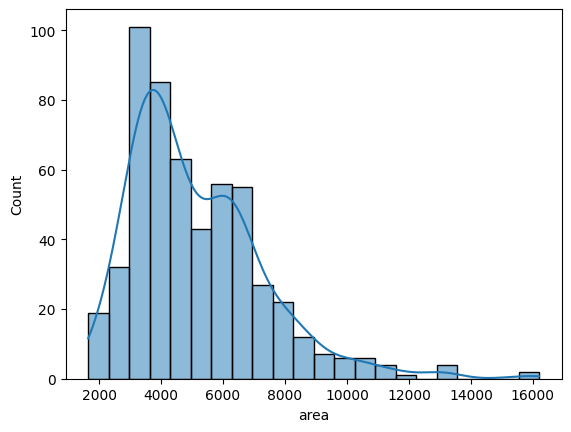

In [ ]:
sns.histplot(dt['area'],kde=True)

<Axes: xlabel='area', ylabel='parking'>

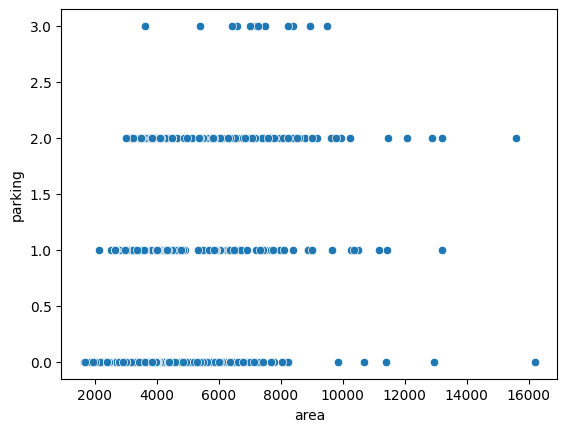

In [ ]:
#bivariant analysis
sns.scatterplot(x=dt['area'],y=dt['parking'])

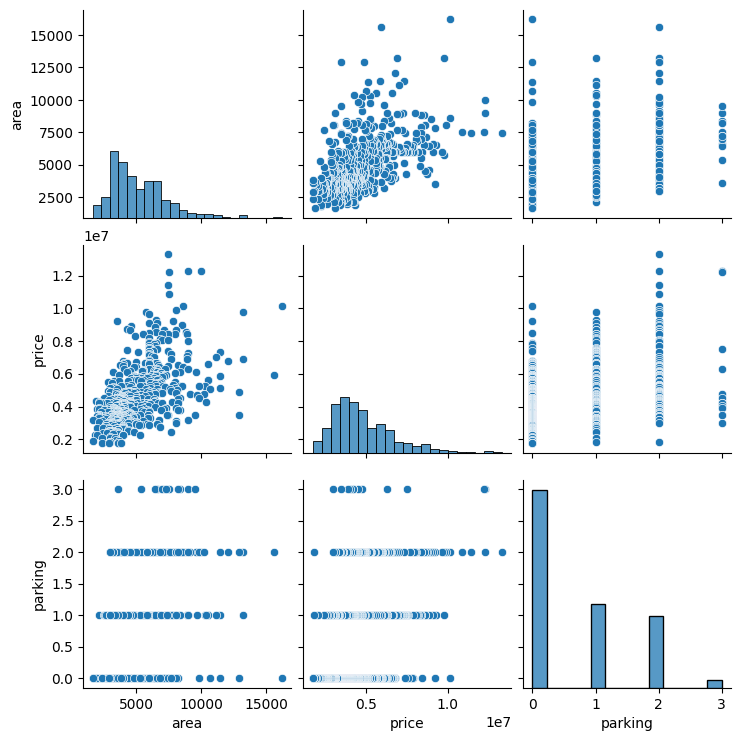

In [ ]:
#multivarient analysis
sns.pairplot(dt[['area','price','parking']])

In [ ]:
dt.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
missing_values=dt.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [ ]:
Q1=dt['price'].quantile(0.25)
Q3=dt['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
dt['price']=dt['price'].apply(lambda x:dt['price'].median() if x<lower_bound or x>upper_bound else x)


In [ ]:
dt.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000.0,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,4340000.0,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,4340000.0,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,4340000.0,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,4340000.0,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [22]:
numeric_columns = ['area', 'price']  # Update with the actual numeric columns in your dataset

for column in numeric_columns:
    Q1 = dt[column].quantile(0.25)
    Q3 = dt[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dt[(dt[column] < lower_bound) | (dt[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in area:
        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
7    10150000  16200         5          3        2      yes        no   
10    9800000  13200         3          1        2      yes        no   
56    7343000  11440         4          1        2      yes        no   
64    7000000  11175         3          1        1      yes        no   
66    6930000  13200         2          1        1      yes        no   
69    6790000  12090         4          2        2      yes        no   
125   5943000  15600         3          1        1      yes        no   
129   5873000  11460         3          1        3      yes        no   
186   5110000  11410         2          1        2      yes        no   
191   5040000  10700         3          1        2      yes       yes   
211   4900000  12900         3          1        1      yes        no   
403   3500000  12944         3          1        1      yes        no   

    basement hotwaterheating air

In [28]:
le=LabelEncoder()

In [70]:
dt.mainroad=le.fit_transform(dt.mainroad)
dt.guestroom=le.fit_transform(dt.guestroom)
dt.basement=le.fit_transform(dt.basement)
dt.hotwaterheating=le.fit_transform(dt.hotwaterheating)
dt.airconditioning=le.fit_transform(dt.airconditioning)
dt.furnishingstatus=le.fit_transform(dt.furnishingstatus)


In [71]:
dt.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [76]:
data_main=pd.get_dummies(dt,columns=['mainroad'])

In [77]:
data_main.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,mainroad_0,mainroad_1
0,13300000,7420,4,2,3,0,0,0,1,2,0,0,1
1,12250000,8960,4,4,4,0,0,0,1,3,0,0,1
2,12250000,9960,3,2,2,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,0,1,0,1,3,0,0,1
4,11410000,7420,4,1,2,1,1,0,1,2,0,0,1


In [78]:
Y=data_main['price']

In [80]:
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [81]:
X=data_main.drop(columns=['parking'],axis=1)

In [82]:
X.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus,mainroad_0,mainroad_1
0,13300000,7420,4,2,3,0,0,0,1,0,0,1
1,12250000,8960,4,4,4,0,0,0,1,0,0,1
2,12250000,9960,3,2,2,0,1,0,0,1,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,0,1
4,11410000,7420,4,1,2,1,1,0,1,0,0,1


In [83]:
name=X.columns
name

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus',
       'mainroad_0', 'mainroad_1'],
      dtype='object')

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scale=MinMaxScaler()

In [95]:
X_scaled=scale.fit_transform(X)
X_scaled

array([[1.        , 0.39656357, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.90909091, 0.5024055 , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.90909091, 0.57113402, 0.4       , ..., 0.5       , 0.        ,
        1.        ],
       ...,
       [0.        , 0.13539519, 0.2       , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.08659794, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.15120275, 0.4       , ..., 1.        , 0.        ,
        1.        ]])

In [96]:
X=pd.DataFrame(X_scaled,columns=name)

In [97]:
X

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus,mainroad_0,mainroad_1
0,1.000000,0.396564,0.6,0.333333,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,0.0,1.0,0.0,0.0,0.5,0.0,1.0
3,0.906061,0.402062,0.6,0.333333,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,1.0,0.0
542,0.000000,0.135395,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [100]:
X_train.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus,mainroad_0,mainroad_1
542,0.000000,0.135395,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
496,0.081818,0.161512,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
484,0.096970,0.095533,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
507,0.072727,0.134021,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
252,0.239394,0.564261,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0


In [101]:
dt.furnishingstatus=le.fit_transform(dt.furnishingstatus)

In [102]:
X_test.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus,mainroad_0,mainroad_1
239,0.245455,0.161512,0.4,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113,0.375152,0.547766,0.4,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
325,0.195455,0.124399,0.6,0.0,0.333333,0.0,0.0,0.0,1.0,0.5,0.0,1.0
66,0.448485,0.793814,0.2,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
479,0.103030,0.138144,0.6,0.0,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [63]:
y_train

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [64]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 12)
(109, 12)
(436,)
(109,)


In [68]:
#model building 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [103]:
lr.fit(X_train,y_train)


LinearRegression()

In [75]:
X_train.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus,mainroad_0,mainroad_1
542,1750000,3620,2,1,1,0,0,0,0,unfurnished,0,1
496,2695000,4000,2,1,1,0,0,0,0,unfurnished,0,1
484,2870000,3040,2,1,1,0,0,0,0,unfurnished,1,0
507,2590000,3600,2,1,1,0,0,0,0,unfurnished,0,1
252,4515000,9860,3,1,1,0,0,0,0,semi-furnished,0,1


In [104]:
#test the model
lr.fit(X_train,y_train)

LinearRegression()

In [105]:
y_pred=lr.predict(X_test)

In [106]:
y_pred

array([ 4585000.        ,  6083000.        ,  4007500.        ,
        6930000.        ,  2940000.        ,  6195000.        ,
        3535000.        ,  2940000.        ,  3500000.        ,
        7980000.00000001,  6755000.        ,  3990000.        ,
        3150000.        ,  3290000.        ,  4130000.        ,
        2660000.        ,  4410000.        ,  3710000.        ,
        3360000.        ,  4270000.        ,  5005000.        ,
        5383000.        ,  6440000.        ,  1890000.        ,
        6125000.        ,  5460000.        ,  5803000.        ,
        4620000.        ,  5530000.        ,  5950000.        ,
        4305000.        ,  3640000.        ,  5250000.        ,
        3325000.        ,  3703000.        ,  4753000.        ,
        9100000.        ,  3500000.        ,  3150000.        ,
        4270000.        ,  8960000.00000001,  4060000.        ,
        5740000.        ,  3129000.        ,  3633000.        ,
        7560000.        ,  4620000.     

In [107]:
E=y_test-y_pred
E

239   -1.862645e-09
113    0.000000e+00
325   -9.313226e-10
66     0.000000e+00
479   -9.313226e-10
           ...     
76    -3.725290e-09
132   -3.725290e-09
311    1.862645e-09
464   -9.313226e-10
155    0.000000e+00
Name: price, Length: 109, dtype: float64

In [115]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
print(acc)

1.0
